# Miniproject - Data Exploration - Analysis of Global Terrorism

DATA SOURCE: [Global Terrorism Database](https://www.kaggle.com/START-UMD/gtd)

### 0. Loading Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

### 1. Getting Data

In [2]:
data_terror = pd.read_csv('../input/globalterrorismdb_0718dist.csv',encoding = 'ISO-8859-1')

data_terror.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data_terror = data_terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data_terror.tail(5)

/home/krypto/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


In [3]:
data_terror.shape

(181691, 17)

In [4]:
data_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
Year           181691 non-null int64
Month          181691 non-null int64
Day            181691 non-null int64
Country        181691 non-null object
Region         181691 non-null object
city           181257 non-null object
latitude       177135 non-null float64
longitude      177134 non-null float64
AttackType     181691 non-null object
Killed         171378 non-null float64
Wounded        165380 non-null float64
Target         181055 non-null object
Summary        115562 non-null object
Group          181691 non-null object
Target_type    181691 non-null object
Weapon_type    181691 non-null object
Motive         50561 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


### 2. Terrorism By Region

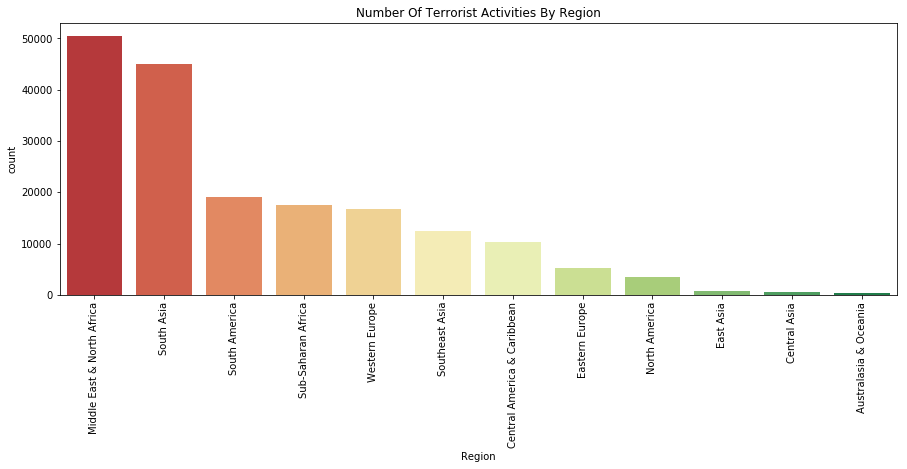

In [5]:
plt.subplots(figsize = (15,5))
sns.countplot('Region',data = data_terror,palette = 'RdYlGn',order = data_terror['Region'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

### 3. Terrorism over the years

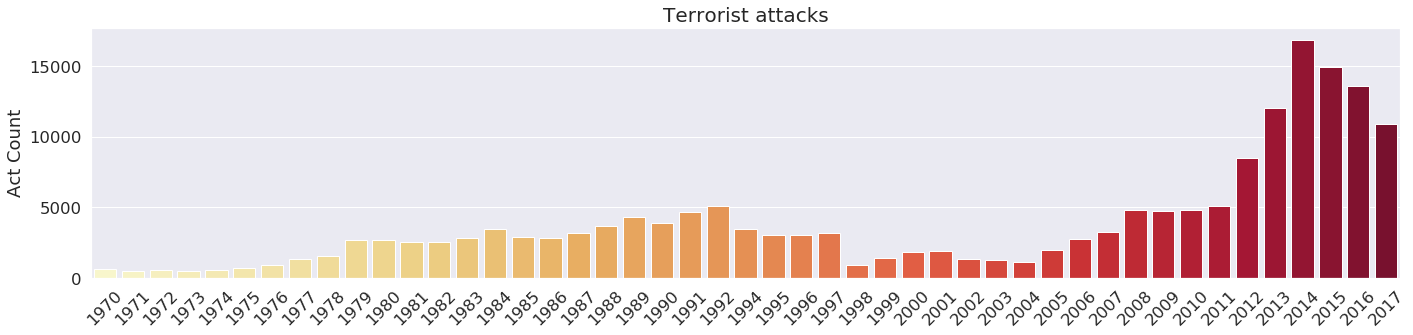

In [6]:
sns.set(font_scale = 1.5)
fig = plt.figure(figsize = (20,5))
sns.countplot(x = 'Year',data = data_terror,palette = 'YlOrRd');
plt.xlabel('')
plt.ylabel('Act Count')
plt.xticks(rotation = 45)
plt.title('Terrorist attacks', fontsize = 20)
plt.tight_layout()

### 4. Number of Deaths per Year

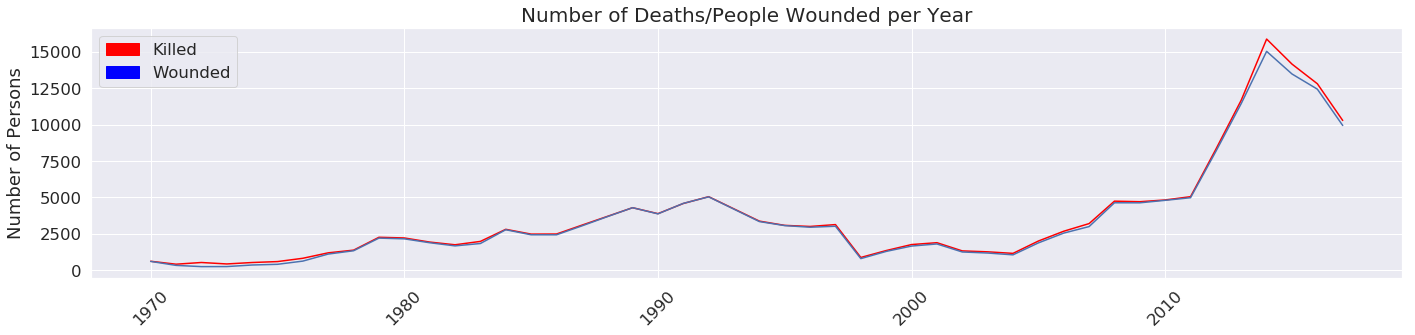

In [7]:
fig = plt.figure(figsize = (20,5))
countt = data_terror.groupby(['Year']).count()
plt.plot(countt.index, countt.Killed, color = 'red')
plt.plot(countt.index, countt.Wounded)
plt.xlabel('')
plt.ylabel('Number of Persons')
plt.xticks(rotation = 45)
plt.title('Number of Deaths/People Wounded per Year', fontsize = 20)
red_patch = mpatches.Patch(color = 'red', label = 'Killed')
blue_patch = mpatches.Patch(color = 'blue', label = 'Wounded')
plt.legend(handles = [red_patch,blue_patch])
plt.tight_layout()

### 5. Average Number of Deaths per Act

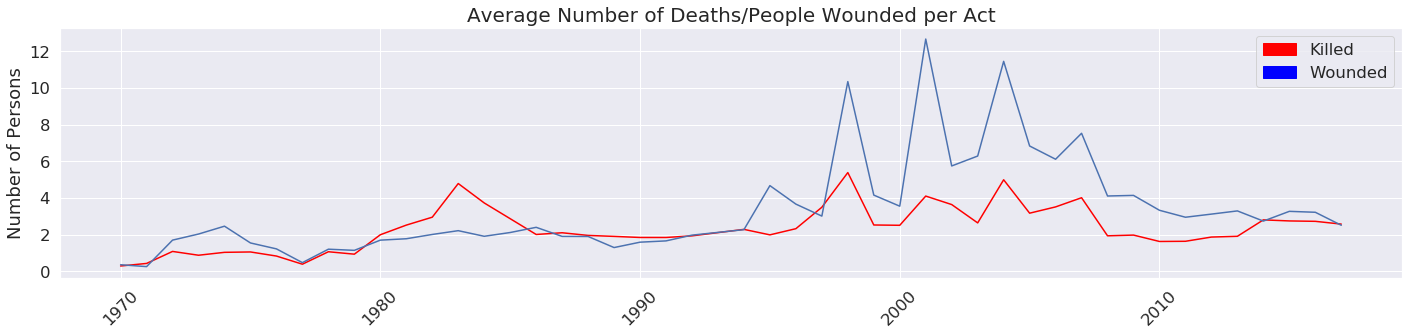

In [8]:
fig = plt.figure(figsize = (20,5))
count_mean = data_terror.groupby(['Year']).mean()
plt.plot(count_mean.index, count_mean.Killed, color = 'red')
plt.plot(count_mean.index, count_mean.Wounded)
plt.xlabel('')
plt.ylabel('Number of Persons')
plt.xticks(rotation=45)
plt.title('Average Number of Deaths/People Wounded per Act', fontsize = 20)
red_patch = mpatches.Patch(color = 'red', label = 'Killed')
blue_patch = mpatches.Patch(color = 'blue', label = 'Wounded')
plt.legend(handles = [red_patch,blue_patch])
plt.tight_layout()

### 6. Attack Type

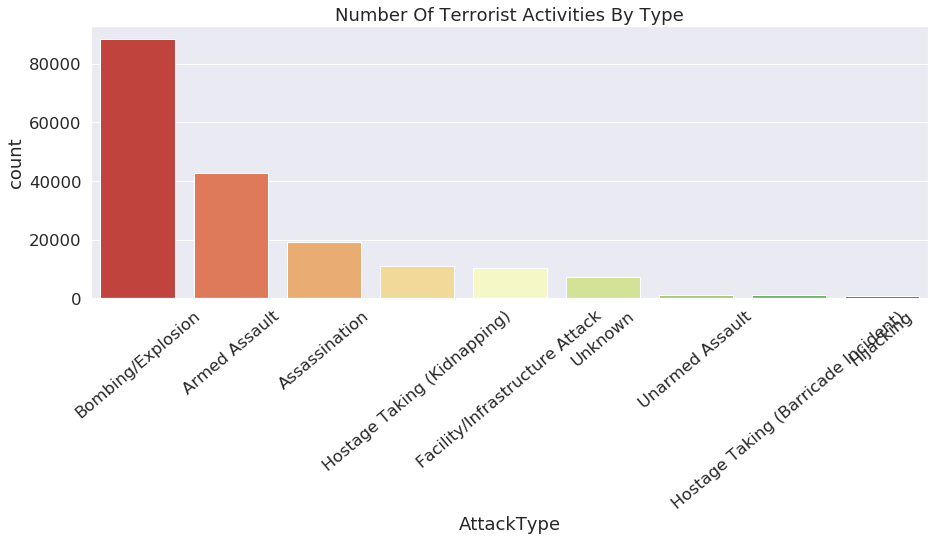

In [9]:
plt.subplots(figsize = (15,5))
sns.countplot('AttackType',data = data_terror,palette = 'RdYlGn',order = data_terror['AttackType'].value_counts().index)
plt.xticks(rotation = 40)
plt.title('Number Of Terrorist Activities By Type')
plt.show()

### 7. Visualisation of the most deadly attacks

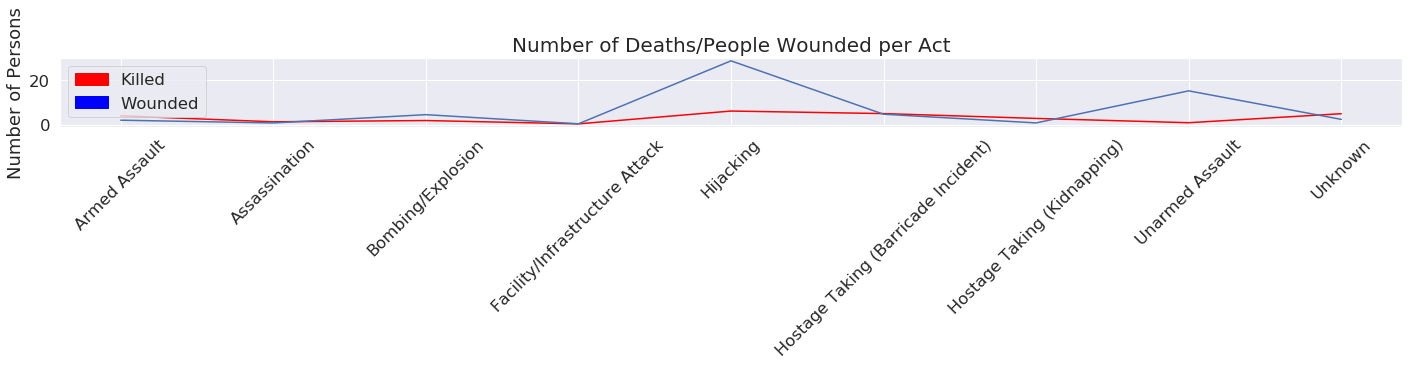

In [10]:
fig = plt.figure(figsize = (20,5))
countt = data_terror.groupby(['AttackType']).mean()
plt.plot(countt.index, countt.Killed, color = 'red')
plt.plot(countt.index, countt.Wounded)
plt.xlabel('')
plt.ylabel('Number of Persons')
plt.xticks(rotation = 45)
plt.title('Number of Deaths/People Wounded per Act', fontsize=20)
red_patch = mpatches.Patch(color = 'red', label = 'Killed')
blue_patch = mpatches.Patch(color = 'blue', label = 'Wounded')
plt.legend(handles = [red_patch,blue_patch])
plt.tight_layout()